# Reducing GTC/OSIRIS data with PypeIt

Install PypeIt as described __[here](https://pypeit.readthedocs.io/en/latest/installing.html)__.

When I use PypeIt, I need to activate the PypeIt environment. For that I use:

```
source pypeit/bin/activate
```

## Before starting

For a smooth reduction process you should have the calibration files and the science files gathered in one single directory - `RAWDIR`. This includes:
- Bias frames
- Flat frames
- Arc frames
- Standard star
- Science object

## 1. Setup PypeIt

To set up PypeIt you need to specify the spectrograph (```-s```) you used in your observations and the ```RAWDIR``` (```-r```). Depending on the time of your observations in GTC/OSIRIS you should use:
- gtc_osiris: old CCD
- gtc_osiris_plus: new CCD

It is recommended to setup and run PypeIt in a separated directory from ```RAWDIR```. ```RAWDIR``` should only be accessed by the reduction routines and not altered.

The command line to setup PypeIt should look like this:

```
pypeit_setup -s gtc_osiris -r RAWDIR
```

This will examine all raw files and auto-generate the following files in a directory called ```setup_files```:
- Observing log (<span style='color:Blue'>gtc_osiris.obslog </span>): log of all the files in ```RAWDIR``` automatically classified
- Sorted list (<span style='color:Blue'>gtc_osiris.sorted </span>): sorted list of the files in ```RAWDIR``` organized into unique instrument configurations. For GTC/OSIRIS, if you have observed with the gratings R1000B and R1000R, for example, you will obtain two different configurations identified by a letter (e.g, "Setup A" for R1000B and "Setup B" for R1000R). Each setup will need its own Pypeit run.

The PypeIt Reduction File is mandatory to run PypeIt and it is the file that you should edit to correct any wrong automatic classification, to add or remove files for the execution or to change any parameter regarding the reduction process. To create this file you should run the same command line as above but with the ```-c``` option. This will create a folder for each configuration (e.g, ```gtc_osiris_A```) and the PypeIt Reduction File for that configuration in the relevant folder (e.g, <span style='color:Blue'>gtc_osiris_A.pypeit </span>). The command line should look like this:

```
pypeit_setup -s gtc_osiris -r RAWDIR -b -c all
```

Instead of *all* one can specify a configuration to be reduced (e.g, A or B). The ```-b``` option will add three columns in your PypeIt Reduction Files
- *comb_id*: science frames with the same integer number will be combined. This column is irrelevant for calibration files, in this case its value should be set to -1.
- *calib*: calibration frames with a specific calibration group number will be used to reduce the science frames with that same calibration group number. Calibration frames can be part of different calibration groups but science frames can only be assigned to one calibration group. The calibration groups should form a running sequence from 1 to 63.
- *bkg_id*: should have a value of -1 when not performing difference imaging.

These columns are important when reducing NIR data, however they can also be useful when reducing GTC/OSIRIS spectra, especially the *calib* column, as we will see later on.


## 2. Reduction File

Once you setted up PypeIt, enter the directory of one of the configurations. You will encounter the Master Reduction File (e.g, <span style='color:Blue'>gtc_osiris_A.pypeit </span>) that will look something like this:

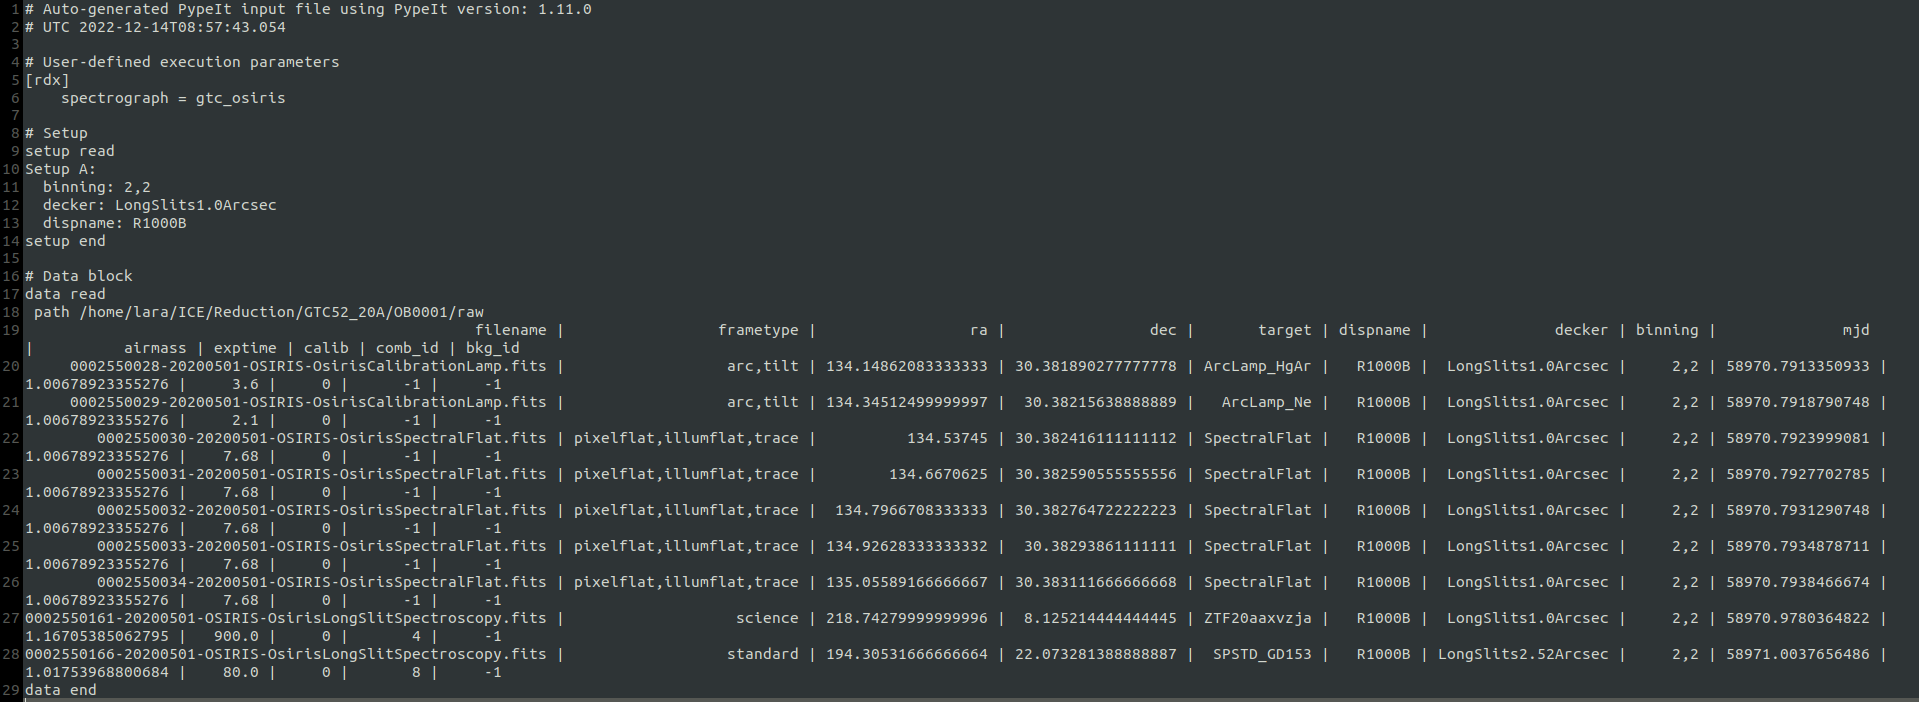

You may need to edit the file to correct any wrong automatic classification, add or remove files for the execution and/or change any parameter regarding the reduction process.

Things you might want/have to change in the Reduction File before running PypeIt for the first time:

1. When reducing data from the GTC/OSIRIS old CCD: there were two detectors and the science object was always centered on chip 2. Therefore, to only extract objects on chip 2, you can add the following in the *User-defined execution parameters* section of your Reduction Files:

```
[rdx]
    spectrograph = gtc_osiris
    detnum = 2
```

2. You can specify how many objects you want to extract. The default is ```maxnumber_sci```=10. By reducing it, you will reduce the reduction time. This will extract the objects from the one that has a higher signal-to-noise ratio (SNR) to the one that has the lower value. If you want, for example, to extract only brightest three objects, add the following in the *User-defined execution parameters* section of your Reduction File:

```
[reduce]
    [[findobj]]
        maxnumber_sci = 3
```

3. You might have noticed that the Reduction File example presented on the image above is lacking bias frames. For some reason, when running PypeIt for GTC/OSIRIS, the bias calibration files are assigned to only one of the configurations Reduction Files. What I usually do is copy the bias frametypes from the other configuration Reduction File (in this case, from <span style='color:Blue'>gtc_osiris_B.pypeit </span>) and paste it in the Reduction File where they are lacking, making sure that the bias frames have the same calibration group number in the *calib* column as the remaining calibration files (this is why this column can be useful!).

4. Make sure that the automatic frametypes classifications are correct. Otherwise, change them accordingly.

## 3. Run PypeIt

Once you are happy with your Reduction File, it's time to run PypeIt! I usually run it on the directory where the Reduction File is, by using the following command line:

```
run_pypeit gtc_osiris_A.pypeit
```

You will obtain the following set of output folders:

- ```Masters```: Master Calibration Files such as the MasterBias and MasterFlat files, for example.
- ```QA```: quality assessment plot.
- ```Science```: extracted 2D and 1D science spectra.

To see which command lines you should use to view the Master Calibration Files, what you should look for on the QA plots and how to visualize the extracted 2D and 1D spectra, check one of PypeIt's tutorials __[here](https://pypeit.readthedocs.io/en/latest/tutorials/kast_howto.html)__.

If you specified that you only wanted to extract objects on chip 2 of the old CCD of GTC/OSIRIS in the Reduction File, you should use ```--det``` to visualize the 2D final output:

```
pypeit_show_2dspec Science/spec2d_0002550161-20200501-OSIRIS-OsirisLongSlitSpectroscopy-ZTF20aaxvzja_OSIRIS_20200501T232822.352.fits --det DET02
```

To visualize the final 1D output you should use:

```
pypeit_show_1dspec Science/spec1d_0002550161-20200501-OSIRIS-OsirisLongSlitSpectroscopy-ZTF20aaxvzja_OSIRIS_20200501T232822.352.fits
```

Take into consideration that the default of the command line above is to exhibit the first extracted spectrum on the detector. If the science object that you have interest in is not the first extracted spectrum, you can assess it by inspecting the list of extracted spectra:

```
pypeit_show_1dspec Science/spec1d_0002550161-20200501-OSIRIS-OsirisLongSlitSpectroscopy-ZTF20aaxvzja_OSIRIS_20200501T232822.352.fits --list
```

This will print out a list of all the N extracted spectra and the extensions assign to each one of them. Then, you can specify the 1D extracted spectrum that you want to observe by running:

```
pypeit_show_1dspec Science/spec1d_0002550161-20200501-OSIRIS-OsirisLongSlitSpectroscopy-ZTF20aaxvzja_OSIRIS_20200501T232822.352.fits --exten N
```

Remember, even after running PypeIt you can go back to the Master Reduction File and change any parameter that you think should be changed in order to obtain a better reduction. Then you can re-run PypeIt by typing in the terminal: 

```
run_pypeit gtc_osiris_A.pypeit -o
```

where ```-o``` stands for overwrite.

Here are some things you might want to change after running PypeIt for the first time and checking the calibration files and extracted spectra:

1. If your science object is too faint to be detected you can modify the SNR threshold to enable its identification. The default is ```snr_thresh```=10.0. To lower it to 7, for example, add this to the *User-defined execution parameters* section of your Reduction File:

```
[reduce]
    [[findobj]]
        snr_thresh = 7.0
```

You can use the plots in the ```QA``` folder with the suffix *_obj_prof* to help you define the SNR threshold needed to extract the science object of interest. 

2. Your spectrum of interest might cover only a small fraction of the detector. In this case, the Object Finding algorithm might fail. You can restrict the spectral region that the Object Finding Process uses to search for objects by adding to your Master Reduction File:

```
[reduce]
    [[findobj]]
        find_min_max = 1200, 2000
```

You can inspect the sky-subtracted 2D output image with ```pypeit_show_2dspec``` to decide which pixels to use for the object finding.


3. Another parameter that you might want to change is the FWHM in pixels for object finding. The default is ```find_fwhm```=5.0. To change it add:

```
[reduce]
    [[findobj]]
        find_fwhm = 3.0
```

**Note 1:** The examples provided above are all regarding the Object Finding Algorithm, which in my experience, is what I had to adjust the most throughout the reduction of GTC/OSIRIS spectra. Keep in mind that, since all the parameters mentioned above are regarding the same step in the reduction process, to change them all at once you only need to add the followinf to the Reduction File:

```
[reduce]
    [[findobj]]
        snr_thresh = 7.0
        find_min_max = 1200, 2000
        find_fwhm = 3.0
```

**Note 2:** __[Here](https://pypeit.readthedocs.io/en/latest/pypeit_par.html#current-pypeitpar-parameter-hierarchy)__ you can explore a little bit more all the user-level parameters that can be changed (there are quite a lot). The default parameters for the spectrographs *gtc_osiris* and *gtc_osiris_plus* are specified __[here](https://pypeit.readthedocs.io/en/latest/pypeit_par.html#gtc-osiris-gtc-osiris)__.

## 4. Manual Extraction

You may need to perform a manual extraction if your science object is too faint to be detected with the default Object Finding algorithm, even when changing its user-level parameters.

To do so:

1. Run PypeIt normally

2. Inspect the 2D outputs with ```pypeit_show_2dspec```

3. Annotate the detector, the spatial and spectral pixel where the trace should cross and the approximate FWHM of the profile (in pixels)

4. Modify the Master Reduction File by adding the *manual* column (or you can also re-run ```pypeit_setup``` with the ```-m``` option, which will add the *manual* column automatically so that you can edit it): 

```
|                 ra |                dec |       target | dispname |              decker | binning |              mjd |          airmass | exptime | calib | comb_id | bkg_id | manual
```

Also add a "|" at the end of each line below the columns. Then, specify the information retrieved in point 2 in the science object line. Here are some example lines:

```
0002578249-20200518-OSIRIS-OsirisLongSlitSpectroscopy.fits |                   science | 280.87498333333326 |            71.7338 | ZTF20abaovyz |   R1000R |  LongSlits1.0Arcsec |     2,2 | 58988.1428413388 | 1.37354839902819 |   900.0 |     0 |       9 |     -1 |       2:210.946:882.887:4.
0002578221-20200518-OSIRIS-OsirisLongSlitSpectroscopy.fits |                  standard | 194.31324999999995 | 21.996348611111113 |  SPSTD_GD153 |   R1000R | LongSlits2.52Arcsec |     2,2 | 58987.9042186537 | 1.02004366744784 |    75.0 |     0 |       4 |     -1 |
```

The ```2:210.946:882.887:4.``` entry indicates det=2 (detector 2), spat=210.946 (spatial pixel), spec=882.887 (spectral pixel) and a FWHM=4.0 (in pixels).

5. Run PypeIt again

**Note:** For more informations on the Manual Extraction process, check out the PypeIt documentation __[here](https://pypeit.readthedocs.io/en/latest/manual.html)__.


## 5. Fluxing

All the information regarding the fluxing process can be accessed __[here](https://pypeit.readthedocs.io/en/latest/fluxing.html)__.

The main steps to execute the fluxing are the following:

1. The following command line analyzes the standard star spectrum (*spec1dfile_std*) and writes the sensitivity file as an output with the name you specify (*output_file_name*):

```
pypeit_sensfunc spec1dfile_std -o output_file_name
```

2. For some reason, in my case, this step did not retrieve a smooth sensitivity function. If I used it as such the final 1D flux-calibrated spectrum exhibited some false peculiar features. Therefore, I usually added a step here where I smoothed the sensitivity function retrieved by applying a Savitzky-Golay filter with the ```savgol_filter``` function from *scipy.signal* in Python. Here is how I implemented it:

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import pdb
import astropy
from astropy.table import Table
from scipy.signal import savgol_filter
import copy
import random

Filename: /home/lara/ICE/Reduction/GTCMULTIPLE2B_23A/OB0001a/gtc_osiris_plus_A/Science/sensfunc_A.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      13   ()      
  1  SENS          1 BinTableHDU     59   1R x 11C   [2024D, 2024D, 2024D, 2024L, 2024D, 2024L, D, K, K, D, D]   
  2  WAVE          1 ImageHDU        19   (1, 3856)   float64   
  3  ZEROPOINT     1 ImageHDU        19   (1, 3856)   float64   
  4  THROUGHPUT    1 ImageHDU        19   (1, 3856)   float64   


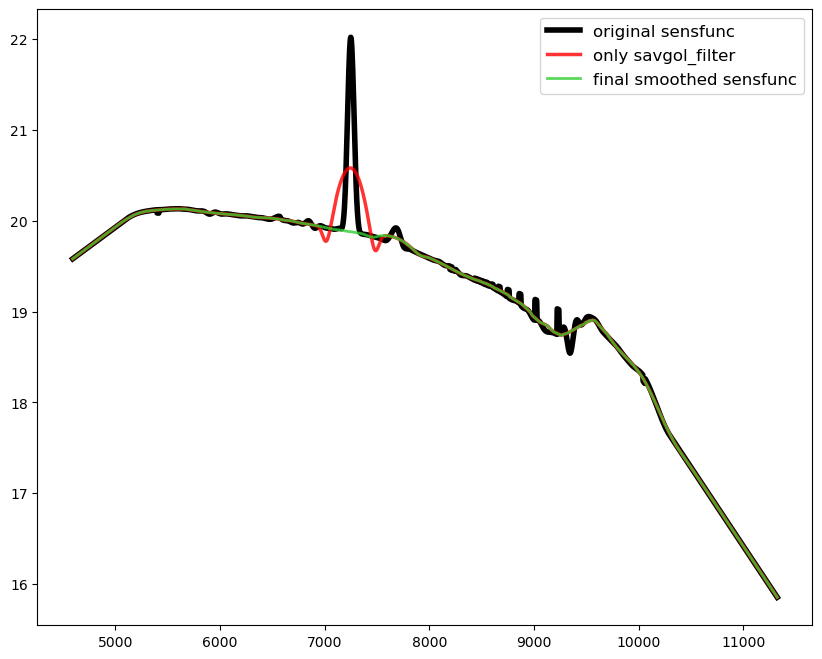

In [2]:
#Open sensitivity file created previously
hdul=fits.open('/home/lara/ICE/Reduction/GTCMULTIPLE2B_23A/OB0001a/gtc_osiris_plus_A/Science/sensfunc_A.fits')
hdul.info()
lam=hdul[2].data.T[0]
sens=hdul[3].data.T[0]

original=copy.deepcopy(sens)

fig,ax=plt.subplots(1,1,figsize=(10,8))

wl=7000
wh=7400
a=sens[(lam>wl)&(lam<wh)]
random_float_list = []
for i in range(0, len(sens[(lam>wl)&(lam<wh)])):
    x = round(random.uniform(a[0], a[-1]), 8)
    random_float_list.append(x)
#Create a sorted list with values between e.g, 19.92363479 (lam=7000A) and 19.84651758 (lam=7400A)
#pdb.set_trace()
sens[(lam>wl)&(lam<wh)]=sorted(random_float_list,reverse=True)

sy1= savgol_filter(original,291, 3) #
sy2 = savgol_filter(sens,291, 3)
plt.plot(lam,original,lw=4,color='k',label='original sensfunc')
plt.plot(lam,sy1,lw=2.5,color='red',label='only savgol_filter',alpha=0.8)
plt.plot(lam,sy2,lw=2,color='limegreen',label='final smoothed sensfunc',alpha=0.8)
plt.legend(fontsize=12)

#Save plot
plt.savefig('/home/lara/ICE/Reduction/GTCMULTIPLE2B_23A/OB0001a/gtc_osiris_plus_A/Science/smooth_sensfunc.jpg', format='jpg', dpi=300, bbox_inches = "tight")

In [25]:
sy2=sy2.reshape(-1,1)

#Create a new file by copying original sensitivity file
new_hdul=copy.deepcopy(hdul)

#Replacing the original values with the smoothed ones
new_hdul[3].data=sy2

#Write new file to use for fluxing
new_hdul.writeto('/home/lara/ICE/Reduction/GTCMULTIPLE2B_23A/OB0001a/gtc_osiris_plus_A/Science/sensfunc_A_smoothed.fits', overwrite=True)

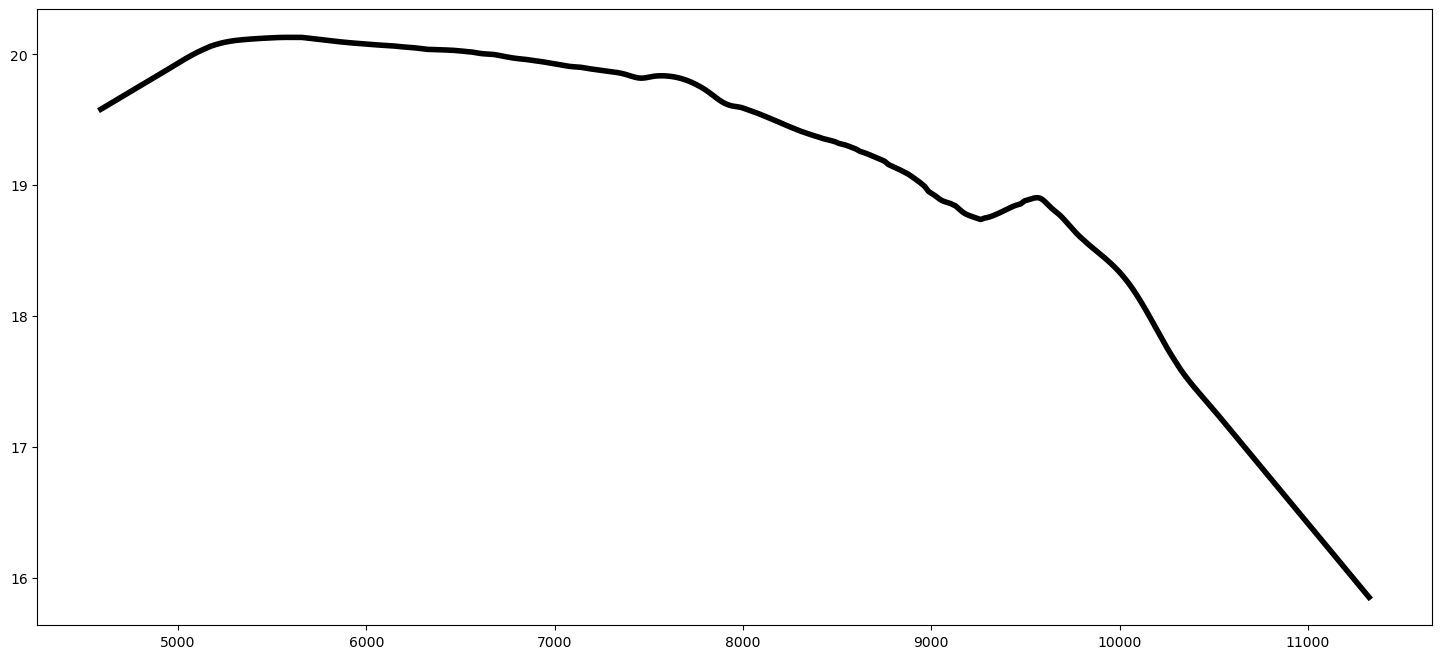

In [27]:
#Final Check
hdul=fits.open('/home/lara/ICE/Reduction/GTCMULTIPLE2B_23A/OB0001a/gtc_osiris_plus_A/Science/sensfunc_A_smoothed.fits')
l=hdul[2].data
f=hdul[3].data

fig,ax=plt.subplots(1,1,figsize=(18,8))
plt.plot(l,f,lw=4,color='k')

3. Then you need to create a .txt file with the science spectra that you want to flux calibrate and the correspondent sensitivity file to do so. There is a specific notation for this type of .txt files:

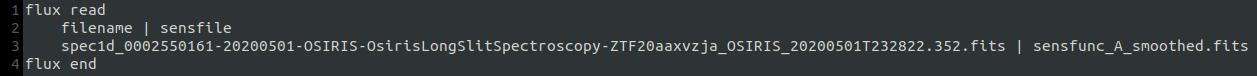

If you want to flux calibrate more than one science spectrum with the same sensitivity file, specify the .fits science file bellow the first one, followed by a |. It will assume the same sensitivity file as the one used to flux calibrate the first specified spectrum.

4. To perform the flux calibration run the following command line, where *flux_file_name* is the .txt file that you created in point 3.:

```
pypeit_flux_ calib flux_file_name
```

5. The flux-calibrated spectra will be added to the final 1D spectra FITS file as **OPT_FLAM** (optimal extraction) in units of $10^{-17}erg/s/cm^2/\overset{\circ}{A}$.

# Telluric Correction

Not done with PypeIt but with the ```tell_corr``` Jupyter Notebook. 